In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from vtl.Readfile import Readfile
from vtl.Photo import Photometry
from spec_id import Highest_likelihood_model_galaxy, Galaxy_ids, Analyze_Stack_avgage_cont_feat_gal_age_correct
import pandas as pd
from glob import glob
from astropy.io import fits, ascii
from astropy.table import Table
from scipy.interpolate import interp1d
import os
import cPickle
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
gids=Galaxy_ids('../data/masslist_mar22.dat')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)

tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [3]:
phot_db = pd.read_pickle('../data/phot_db.pkl')
gphot_db = pd.read_pickle('../data/gphot_db.pkl')

In [5]:
gphot_db

,eff_wv,fwhm,n14713,n14713_err,n16758,n16758_err,n21156,n21156_err,n21427,n21427_err,...,s44620,s44620_err,s45972,s45972_err,s46066,s46066_err,s47677,s47677_err,s48631,s48631_err
F850LP,9001,1235,-9.900000e+01,-9.900000e+01,1.655282e-18,3.382030e-19,2.003905e-18,2.096867e-19,-9.900000e+01,-9.900000e+01,...,-9.900000e+01,-9.900000e+01,2.056985e-18,2.375407e-19,-9.900000e+01,-9.900000e+01,5.833260e-19,2.239912e-19,-9.900000e+01,-9.900000e+01
F098M,9841,1163,9.682768e-19,2.617330e-19,2.008664e-18,2.152191e-19,2.649684e-18,1.346482e-19,7.994261e-19,2.839103e-19,...,8.767648e-19,1.351198e-19,2.200527e-18,1.506057e-19,-9.900000e+01,-9.900000e+01,6.405570e-19,1.405135e-19,1.968022e-18,2.797842e-19
Subaru-IA827,8245,245,7.947088e-19,8.292351e-19,1.447455e-18,6.666587e-19,1.407453e-18,4.010380e-19,-9.900000e+01,-9.900000e+01,...,5.026337e-19,4.123109e-19,1.854709e-18,4.594202e-19,5.299989e-19,6.859244e-19,4.885793e-19,4.360372e-19,1.192332e-18,8.374406e-19
Subaru-IA856,8563,266,-9.900000e+01,-9.900000e+01,1.125222e-18,4.227022e-19,1.457018e-18,2.742420e-19,-9.900000e+01,-9.900000e+01,...,-9.900000e+01,-9.900000e+01,1.846765e-18,3.065970e-19,-9.900000e+01,-9.900000e+01,5.145593e-19,2.929361e-19,-9.900000e+01,-9.900000e+01
Subaru-suprime-z,9077,970,7.824379e-19,3.797168e-19,1.737623e-18,3.102450e-19,2.044850e-18,1.928585e-19,-9.900000e+01,-9.900000e+01,...,7.012145e-19,1.985662e-19,2.024572e-18,2.186666e-19,6.034993e-19,3.089458e-19,5.861945e-19,2.054020e-19,1.889125e-18,4.041955e-19


In [7]:
print gphot_db['s39170']
print '-------------------------'
# print phot_db['s39170']
print phot_db['s39170'][['s_F850LP','s_F850LPcand','n_F850LP','s_F098M','s_IA827','s_IA856','n_Z']]

F850LP              4.008492e-18
F098M               4.466324e-18
Subaru-IA827        3.215191e-18
Subaru-IA856        3.306007e-18
Subaru-suprime-z    4.111896e-18
Name: s39170, dtype: float64
-------------------------
s_F850LP        32.128795
s_F850LPcand   -99.000000
n_F850LP       -99.000000
s_F098M         44.080278
s_IA827         20.969773
s_IA856         24.557825
n_Z            -99.000000
Name: s39170, dtype: float64


In [9]:
Clam = 3E18 / phot_db['eff_wv'][['s_F850LP','s_F098M','s_IA827','s_IA856','n_Z']] **2 * 10**((-1.1)/2.5-29)
print Clam

s_F850LP    1.344435e-19
s_F098M     1.124716e-19
s_IA827     1.602286e-19
s_IA856     1.485489e-19
n_Z         1.322016e-19
Name: eff_wv, dtype: float64


In [11]:
s_F850LP = np.zeros(len(gids.ids))
s_F850LPcand = np.zeros(len(gids.ids))
n_F850LP = np.zeros(len(gids.ids))
s_F098M = np.zeros(len(gids.ids))
s_IA827 = np.zeros(len(gids.ids))
s_IA856 = np.zeros(len(gids.ids))
n_Z = np.zeros(len(gids.ids))

for i in range(len(gids.ids)):
    if gphot_db[gids.ids[i]]['F850LP'] < 0 or phot_db[gids.ids[i]]['s_F850LP']  < 0:
        s_F850LP[i] = np.nan
    else:
        s_F850LP[i] = gphot_db[gids.ids[i]]['F850LP'] / (phot_db[gids.ids[i]]['s_F850LP']*Clam[0])
    ##########################################################################################
    if gphot_db[gids.ids[i]]['F850LP']  < 0 or phot_db[gids.ids[i]]['s_F850LPcand']  < 0:
        s_F850LPcand[i] = np.nan
    else:
        s_F850LPcand[i] = gphot_db[gids.ids[i]]['F850LP'] / (phot_db[gids.ids[i]]['s_F850LPcand']*Clam[0])
    ##########################################################################################
    if gphot_db[gids.ids[i]]['F850LP']  < 0 or phot_db[gids.ids[i]]['n_F850LP']  < 0:
        n_F850LP[i] = np.nan
    else:
        n_F850LP[i] = gphot_db[gids.ids[i]]['F850LP'] / (phot_db[gids.ids[i]]['n_F850LP']*Clam[0])
    ##########################################################################################
    if gphot_db[gids.ids[i]]['F098M']  < 0 or phot_db[gids.ids[i]]['s_F098M']  < 0:
        s_F098M[i] = np.nan
    else:
        s_F098M[i] = gphot_db[gids.ids[i]]['F098M'] / (phot_db[gids.ids[i]]['s_F098M']*Clam[1])
    ##########################################################################################
    if gphot_db[gids.ids[i]]['Subaru-IA827']  < 0 or phot_db[gids.ids[i]]['s_IA827']  < 0:
        s_IA827[i] = np.nan
    else:
        s_IA827[i] = gphot_db[gids.ids[i]]['Subaru-IA827'] / (phot_db[gids.ids[i]]['s_IA827']*Clam[2])
    ##########################################################################################
    if gphot_db[gids.ids[i]]['Subaru-IA856']  < 0 or phot_db[gids.ids[i]]['s_IA856']  < 0:
        s_IA856[i] = np.nan
    else:
        s_IA856[i] = gphot_db[gids.ids[i]]['Subaru-IA856'] / (phot_db[gids.ids[i]]['s_IA856']*Clam[3])
    ##########################################################################################
    if gphot_db[gids.ids[i]]['Subaru-suprime-z']  < 0 or phot_db[gids.ids[i]]['n_Z']  < 0:
        n_Z[i] = np.nan
    else:
        n_Z[i] = gphot_db[gids.ids[i]]['Subaru-suprime-z'] / (phot_db[gids.ids[i]]['n_Z']*Clam[4])

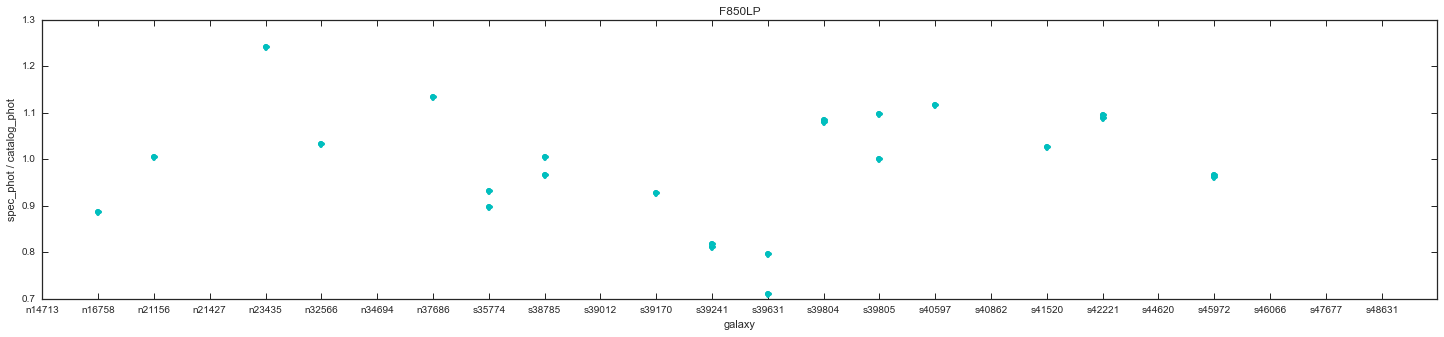

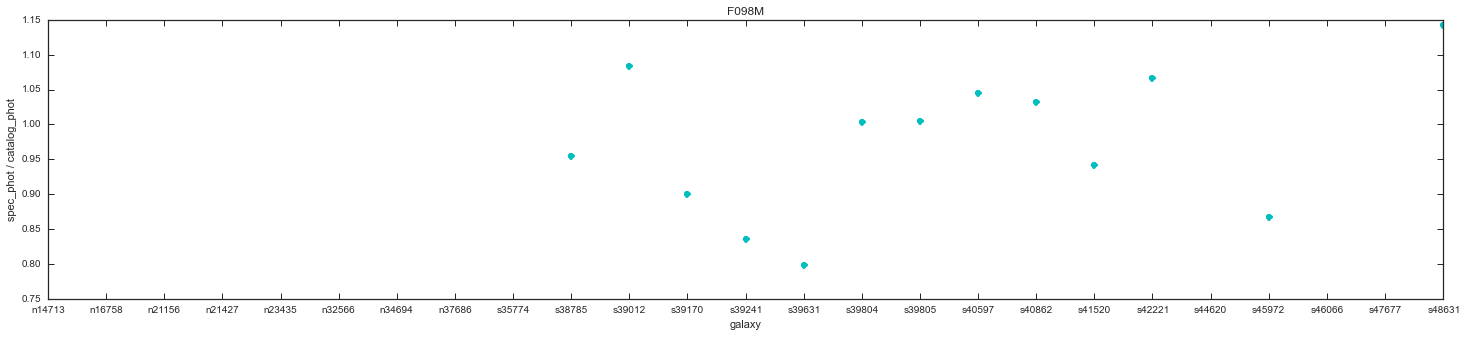

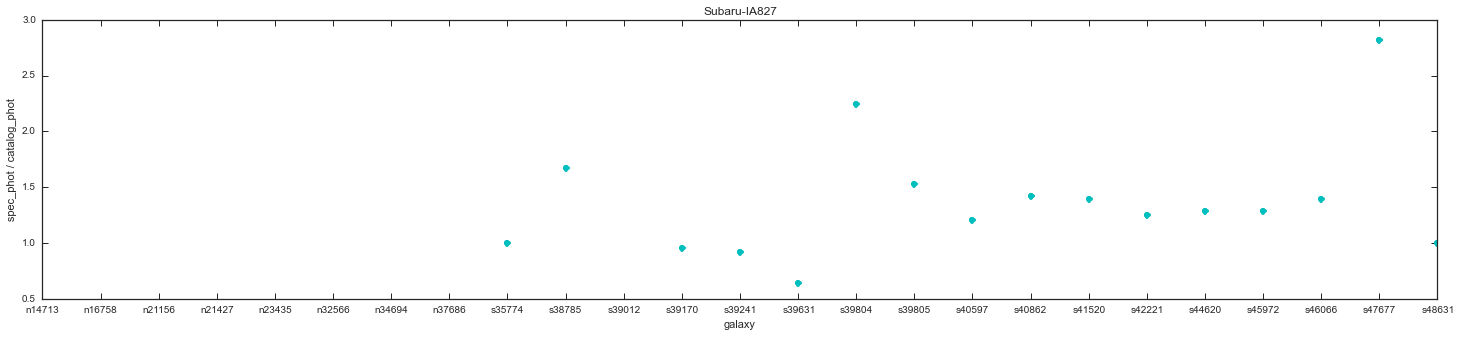

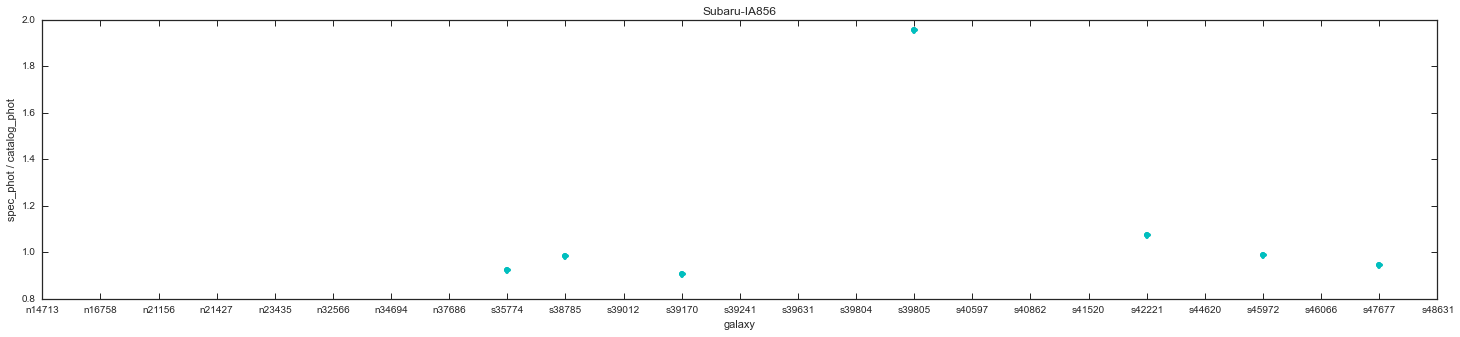

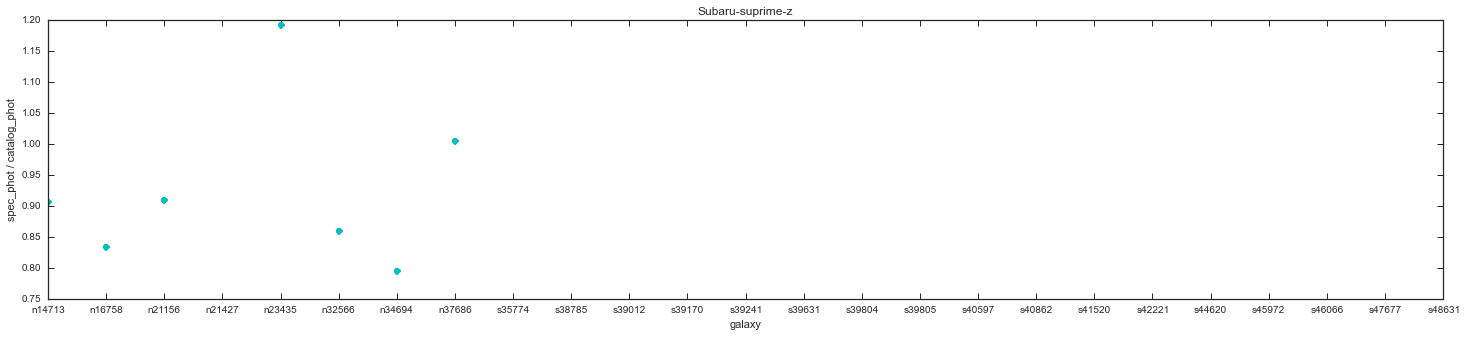

In [52]:
%matplotlib inline

plt.figure(figsize=[25,5])
plt.plot(s_F850LP,'co')
plt.plot(s_F850LPcand,'co')
plt.plot(n_F850LP,'co')
plt.xticks(range(len(gids.ids)),gids.ids)
plt.title('F850LP')
plt.ylabel('spec_phot / catalog_phot')
plt.xlabel('galaxy')
plt.show()
plt.close()

plt.figure(figsize=[25,5])
plt.plot(s_F098M,'co')
plt.xticks(range(len(gids.ids)),gids.ids)
plt.title('F098M')
plt.ylabel('spec_phot / catalog_phot')
plt.xlabel('galaxy')
plt.show()
plt.close()

plt.figure(figsize=[25,5])
plt.plot(s_IA827,'co')
plt.xticks(range(len(gids.ids)),gids.ids)
plt.title('Subaru-IA827')
plt.ylabel('spec_phot / catalog_phot')
plt.xlabel('galaxy')
plt.show()
plt.close()

plt.figure(figsize=[25,5])
plt.plot(s_IA856,'co')
plt.xticks(range(len(gids.ids)),gids.ids)
plt.title('Subaru-IA856')
plt.ylabel('spec_phot / catalog_phot')
plt.xlabel('galaxy')
plt.show()
plt.close()

plt.figure(figsize=[25,5])
plt.plot(n_Z,'co')
plt.xticks(range(len(gids.ids)),gids.ids)
plt.title('Subaru-suprime-z')
plt.ylabel('spec_phot / catalog_phot')
plt.xlabel('galaxy')
plt.show()
plt.close()

In [12]:
print gphot_db['s39012']['Subaru-IA827']
print phot_db['s39012']['s_IA827']

2.7813319769e-19
-0.021611


In [4]:
cs1 = np.zeros(len(gids.ids))

cp1 = np.zeros(len(gids.ids))
cp2 = np.zeros(len(gids.ids))

for i in range(len(gids.ids)):
    if phot_db[gids.ids[i]]['s_F850LP'] < 0 or phot_db[gids.ids[i]]['s_F850LP'] < 0:
        cp1[i] = np.nan
    else:
        cp1[i] = 2.5 * np.log10( phot_db[gids.ids[i]]['s_F098M']/ phot_db[gids.ids[i]]['s_F850LP'])
    ##########################################################################################
    if phot_db[gids.ids[i]]['s_F850LP'] < 0 or phot_db[gids.ids[i]]['s_F850LPcand'] < 0:
        cp2[i] = np.nan
    else:
        cp2[i] = 2.5 * np.log10( phot_db[gids.ids[i]]['s_F098M']/ phot_db[gids.ids[i]]['s_F850LPcand'])
    ##########################################################################################
    if gphot_db[gids.ids[i]]['F098M'] < 0 or gphot_db[gids.ids[i]]['F850LP'] < 0:
        cs1[i] = np.nan
    else:
        cs1[i] = 2.5 * np.log10(gphot_db[gids.ids[i]]['F098M']/gphot_db[gids.ids[i]]['F850LP'])

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


In [5]:
zy1= [cs1[u] - cp1[u] for u in range(len(cs1)) if cs1[u] - cp1[u] < 0]
zy2= [cs1[u] - cp2[u] for u in range(len(cs1)) if cs1[u] - cp2[u] < 0]
zyids= [gids.ids[u] for u in range(len(cs1)) if cs1[u] - cp2[u] < 0 or cs1[u] - cp1[u] < 0]

In [6]:
print zy

NameError: name 'zy' is not defined

In [8]:
%matplotlib inline

plt.figure(figsize=[15,5])
plt.plot(zy1,'co')
plt.plot(zy2,'co')
plt.xlim(-.5,9.5)
plt.xticks(range(len(zyids)),zyids)
# plt.title('F850LP')
plt.ylabel('$\Delta$(Z-Y)')
plt.xlabel('galaxy')
# plt.show()
plt.savefig('../plots/photometry_compare.png')
plt.close()